# Part 1
## DoWhy example

This exercise is based on [Confounding Example: Finding causal effects from observed data](https://www.pywhy.org/dowhy/v0.11.1/example_notebooks/dowhy_confounder_example.html#Confounding-Example:-Finding-causal-effects-from-observed-data)

Based on the concepts introduced in the previous lecture on estimating causal effects. The first part of the exercise is to use the DoWhy library to estimate causal effects on a dataset. 

In order to evaluate the precision of the estimation we need to simulate the dataset, so we know the true effect. To do this you can either:

1) simulate the dataset yourself based on the SCM principles;
2) use the funtion ```dowhy.datasets.linear_dataset``` to simulate the dataset for you.


When you have the dataset causal effect using DoWhy.

### STEP 1: Model the problem as a causal graph

Once you have a dataset, you need to build the graph that generated the dataset. If you use the DoWhy function it will also generate the graph for you. Once you have the graph remember to plot it! Always make a visualisation if possible. 

### STEP 2: Identify causal effect using properties of the formal causal graph

Once the estimand is identified check it for backdoors, iv (instrumental variables) and frontdoors. If you are happy continue. Pause and consider what would you do if you were not happy with a given estimand? 

### STEP 3: Estimate the causal effect

Estimate the effect and evaluate it. 

### OPTIONAL Step 4: Refuting the estimate

There are several techniques to refute the estimate, in the example link above a few is given. You can try them out and consider what is the reasons for doing them. 






In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'INFO',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)


In [17]:
# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [2]:
rvar = 1 if np.random.uniform() >0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,
                                      num_common_causes=1,
                                      sd_error=0.2)
df = data_dict['df']
print(df[["Treatment", "Outcome", "w0"]].head())

   Treatment    Outcome        w0
0   2.291634   4.117602 -3.922501
1   3.352881   6.713353 -2.632948
2   4.289839   8.997361 -1.551660
3   9.255893  18.588032  3.240016
4   2.225472   4.361225 -3.987035


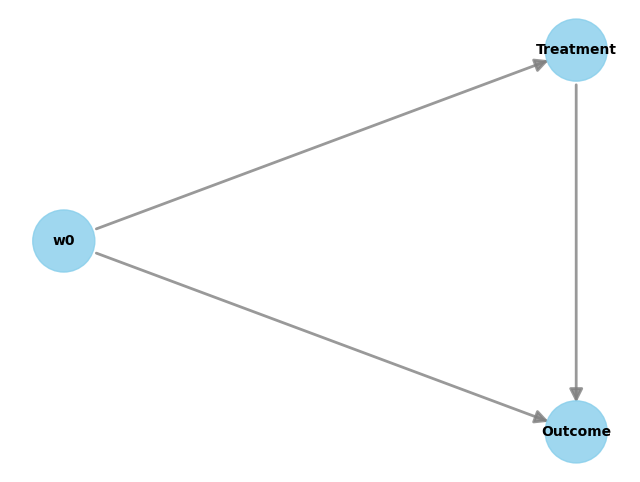

In [4]:
model= CausalModel(
    data=df,
    treatment=data_dict["treatment_name"],
    outcome=data_dict["outcome_name"],
    common_causes=data_dict["common_causes_names"],
    instruments=data_dict["instrument_names"])
model.view_model()

## __Step 2__

In [5]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[Outcome|w0])
d[Treatment]               
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## __Step 3__

/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Causal Estimate is -0.0042869241602065955


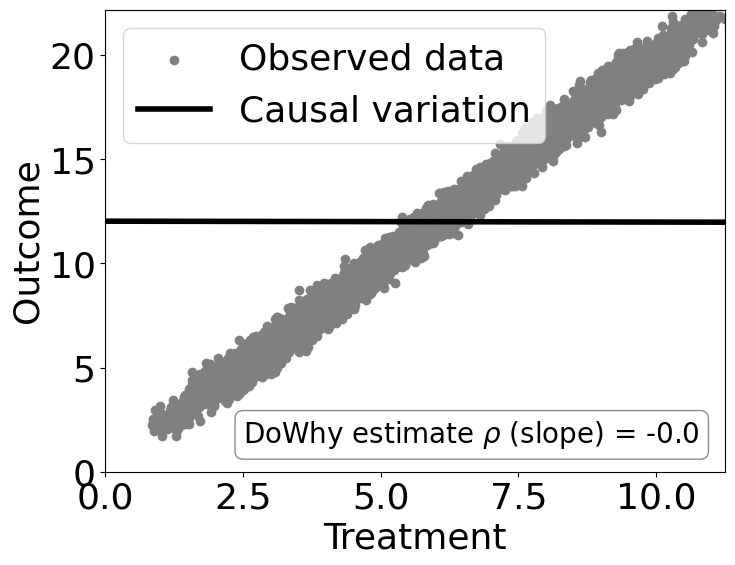

In [6]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

Causal estimate is essentially a beta value - we're doing a linear fitting so we're looking at it to see if it captures the beta value I guess that we've given to our model (?)

In [8]:
print("DoWhy estimate is " + str(estimate.value))
print ("Actual true causal effect was {0}".format(rvar))

DoWhy estimate is -0.0042869241602065955
Actual true causal effect was 0


## __Step 4__

In [9]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Se

Refute: Add a random common cause
Estimated effect:-0.0042869241602065955
New effect:-0.004290765443237757
p value:0.96



/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [10]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Se

Refute: Use a Placebo Treatment
Estimated effect:-0.0042869241602065955
New effect:4.55741371740892e-05
p value:0.96



/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [11]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Se

Refute: Use a subset of data
Estimated effect:-0.0042869241602065955
New effect:-0.004296838192957271
p value:0.94



/work/AnjaFeibelMeerwald#2761/data_science/DataSci-AU-24/env/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


# Part 2
## Consider how to apply causal inference to your own project.

For your own spend some time considering could causal inference be useful, consider both 
why and why not. 

What sort of questions could causal inference solve in your project?

For causal inference to be useful several things need to be considered: 

- What is the data generating process (DGP)?
- How to graph the DGP?
    - How would you find the information needed to graph it?
    - What is the relation between the different nodes in the graph?
- What is the treatment variable?
- Consider the estimand.
    - Anything that needs to be changed?
- How would you interpret and use any finding? 


